### With data aggregation and data visualization answer the following questions:
* What is the change in pct of divorced danes from 2008 to 2020?
* Which of the 5 biggest cities has the highest percentage of 'Never Married'?
* Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
* Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# What is the change in pct of divorced danes from 2008 to 2020?
df = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=155%2C185%2C165%2C151%2C159%2C167%2C163%2C183%2C173%2C187&K%C3%98N=1%2C2%2CTOT&CIVILSTAND=TOT%2CU%2CG%2CF%2CE&Tid=2008K1%2C2020K1',delimiter=';')
divorced_2008 = df.loc[(df['CIVILSTAND']=='Fraskilt') & (df['KØN']=='I alt') & (df['TID'] == '2008K1')]['INDHOLD'].sum()
divorced_2020 = df.loc[(df['CIVILSTAND']=='Fraskilt') & (df['KØN']=='I alt') & (df['TID'] == '2020K1')]['INDHOLD'].sum()
change_in_pct = round(((divorced_2020 - divorced_2008) / divorced_2008)*100)
print('2008:', divorced_2008)
print('2020:', divorced_2020)
print('change:', change_in_pct,'%')

2008: 31328
2020: 36973
change: 18.0 %


In [57]:
df

,OMRÅDE,KØN,CIVILSTAND,TID,INDHOLD
0,Dragør,Mænd,I alt,2008K1,6475
1,Dragør,Mænd,I alt,2020K1,7122
2,Dragør,Mænd,Ugift,2008K1,2619
3,Dragør,Mænd,Ugift,2020K1,3097
4,Dragør,Mænd,Gift/separeret,2008K1,3269
...,...,...,...,...,...
295,Vallensbæk,I alt,Gift/separeret,2020K1,7290
296,Vallensbæk,I alt,Fraskilt,2008K1,889
297,Vallensbæk,I alt,Fraskilt,2020K1,1277
298,Vallensbæk,I alt,Enke/enkemand,2008K1,566


In [10]:
#Which of the 5 biggest cities has the highest percentage of 'Never Married'?
never_married = df.loc[(df['KØN']=='I alt') & (df['CIVILSTAND']=='Ugift') & (df['TID']=='2020K1')].tail()
all = df.loc[(df['KØN']=='I alt') & (df['CIVILSTAND']=='I alt') & (df['TID']=='2020K1')].tail()
for index, not_married in never_married.iterrows():
    pct = (100 / all.loc[all['OMRÅDE'] == not_married['OMRÅDE']]['INDHOLD']) * not_married['INDHOLD']
    #print(not_married['OMRÅDE'], pct)

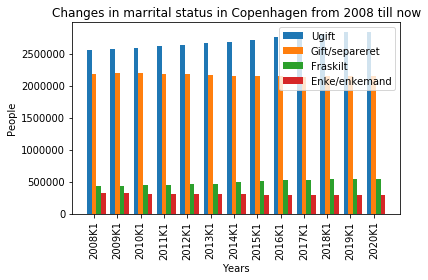

In [52]:
#Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
df2 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1&CIVILSTAND=U%2CG%2CE%2CF', delimiter=';')
years = np.unique(df2['TID'])
years_indices = np.arange(len(years))
width = 0.20
divorced = df2.loc[(df2['CIVILSTAND'] == 'Fraskilt')].sort_values('TID')['INDHOLD'].values.tolist()
married = df2.loc[(df2['CIVILSTAND'] == 'Gift/separeret')].sort_values('TID')['INDHOLD'].values.tolist()
enke = df2.loc[(df2['CIVILSTAND'] == 'Enke/enkemand')].sort_values('TID')['INDHOLD'].values.tolist()
not_married = df2.loc[(df2['CIVILSTAND'] == 'Ugift')].sort_values('TID')['INDHOLD'].values.tolist()

plt.bar(years_indices - width, not_married, width=width, label="Ugift")
plt.bar(years_indices, married, width=width, label="Gift/separeret")
plt.bar(years_indices + width, divorced, width=width, label="Fraskilt")
plt.bar(years_indices + (width * 2), enke, width=width, label="Enke/enkemand")

plt.xticks(ticks=years_indices, labels=years, rotation="vertical")
plt.legend()
plt.title("Changes in marrital status in Copenhagen from 2008 till now")
plt.xlabel("Years")
plt.ylabel("People")

plt.tight_layout()

plt.show()


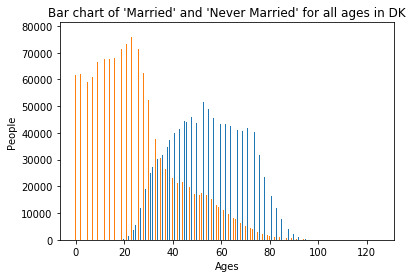

In [68]:
#Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)
df3 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?ALDER=*&CIVILSTAND=G%2CU', delimiter=';')
married = df3.loc[(df3['ALDER'] != 'I alt') & (df3['CIVILSTAND'] == 'Gift/separeret')]['INDHOLD']
never_married = df3.loc[(df3['ALDER'] != 'I alt') & (df3['CIVILSTAND'] == 'Ugift')]['INDHOLD']

ages = np.arange(0, 126)
width = 0.2
plt.bar(ages - width, married, width=width, label="Gift/separeret")
plt.bar(ages, never_married, width=width, label="Ugift")

#this shows all the ages, but it won't be that readable on jupyter notebook..
#plt.xticks(ticks=ages, labels=[n for n in range(0, 126)], rotation="vertical")

plt.title("Bar chart of 'Married' and 'Never Married' for all ages in DK")
plt.xlabel("Ages")
plt.ylabel("People")



plt.show()